In [1]:
import pandas as pd
import re
import functools
import operator
import urllib.parse
import urllib.request

import requests
import time
from multiprocessing.pool import ThreadPool

# Importar o arquivo besthits de interesse ou algum arquivo para retirar apenas o GI
df_saqua_biosurfdb = pd.read_csv("besthits_saqua_biosurfdb.csv")
df_saqua_biosurfdb.rename(columns=lambda x: x.strip(),inplace=True)
df_saqua_biosurfdb.columns

gi_number = [re.findall(r"(\d+)[^0-9]\|", ii[1]['sseqid']) for ii in df_saqua_biosurfdb.iterrows()]
gi_number = functools.reduce(operator.iconcat, gi_number, [])


uniprot_id = []


#url = 'https://www.uniprot.org/uploadlists/'
#for ii in gi_number:
#    params = {'from': 'P_GI','to': 'ACC','format': 'tab','query': ii}

#    data = urllib.parse.urlencode(params)
#    data = data.encode('utf-8')
#    req = urllib.request.Request(url, data)
#    with urllib.request.urlopen(req) as f:
#       response = f.read()
#    aux = response.decode('utf-8')
#    uniprot_id.append(aux)

In [3]:
len(gi_number)

31650

In [ ]:
import requests
import time
from multiprocessing.pool import ThreadPool

tic = time.perf_counter()

BASE = 'http://www.uniprot.org'
TOOL_ENDPOINT = '/uploadlists/'

def create_chunks(list_name, n):
    for i in range(0, len(list_name), n):
        yield list_name[i:i + n]


def map_retrieve(ids2map, source_fmt='P_GI',target_fmt='ACC', output_fmt='tab'):

    if hasattr(ids2map, 'pop'):
        ids2map = ' '.join(ids2map)
    payload = {'from': source_fmt,
    'to': target_fmt,
    'format': output_fmt,
    'query': ids2map,
    }

    response = requests.get(BASE + TOOL_ENDPOINT, params=payload)
   
    if response.ok:
        return response.url
    else:
        response.raise_for_status
list_urls = []

list_gi_num = list(create_chunks(gi_number,700))
pool_iter = ThreadPool(4).imap(map_retrieve,list_gi_num)

for ii in pool_iter:
    print(ii)
    
toc = time.perf_counter()
print(toc-tic)

In [ ]:
import os
import requests
from time import time
from multiprocessing.pool import ThreadPool

def url_response(url):
    url = url
    r = requests.get(url, stream = True)
    with open(url.rsplit("/")[4], 'wb') as f:
        for ch in r:
            f.write(ch)
            
result_iter = ThreadPool(5).imap_unordered(url_response,list_urls)
for ii in result_iter:
    print(ii)

None


In [1]:
# Está célula é para capturar os UNIPROT_IDs mapeados de acordo com o GI

import pandas as pd
import re
import functools
import operator
import urllib.parse
import urllib.request

import requests
import time
from multiprocessing.pool import ThreadPool
#Armazena o arquivo, retira os espaçoes dos cabeçalhos.
df_saqua_biosurfdb = pd.read_csv("C:\\Users\\eulle\\Documents\\besthits_saqua_biosurfdb.csv")
df_saqua_biosurfdb.rename(columns=lambda x: x.strip(),inplace=True)
df_saqua_biosurfdb.columns
# Retira apenas o GI presente na coluna do csv.
# A lista de lista é transformada em uma lista
gi_number = [re.findall(r"(\d+)[^0-9]\|", ii[1]['sseqid']) for ii in df_saqua_biosurfdb.iterrows()]
gi_number = functools.reduce(operator.iconcat, gi_number, [])

tic = time.perf_counter()

BASE = 'http://www.uniprot.org'
TOOL_ENDPOINT = '/uploadlists/'

#Esta func faz o download de todas as urls geradas no uniprot
def url_response(url):
    url = url
    r = requests.get(url, stream = True)
    with open("uniprot_id/"+ url.rsplit("/")[4], 'wb') as f:
        for ch in r:
            f.write(ch)
#Esta func transforma a lista de GI numbers em pequenos pedaços,porque a api só aceita aproximandamente        
#700 GIs por vez
def create_chunks(list_name, n):
    for i in range(0, len(list_name), n):
        yield list_name[i:i + n]

# Aqui pega os GIs e gera as urls que serão posteriormente baixadas utilizando a func url_response
def map_retrieve(ids2map, source_fmt='P_GI',target_fmt='ACC', output_fmt='tab'):

    if hasattr(ids2map, 'pop'):
        ids2map = ' '.join(ids2map)
    payload = {'from': source_fmt,
    'to': target_fmt,
    'format': output_fmt,
    'query': ids2map,
    }

    response = requests.get(BASE + TOOL_ENDPOINT, params=payload,headers={"User-Agent":"Mozilla/5.0"})
   
    if response.ok:
        return response.url
    else:
        return response.raise_for_status
# Aqui são chamadas as funcs para no final ter todos os GIs que foram convertidos em UNIPROT ACC
list_urls = []

list_gi_num = list(create_chunks(gi_number,700))
pool_iter_uniprot = ThreadPool(10).imap(map_retrieve,list_gi_num)

for ii in pool_iter_uniprot:
    list_urls.append(ii)


toc = time.perf_counter()
print(toc-tic)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

[['1129201119',
  '501777080',
  '1013860365',
  '1131832150',
  '757435113',
  '1086495370',
  '359760822',
  '811258598',
  '514424824',
  '1001797657',
  '1004168173',
  '1050998670',
  '154366346',
  '822876331',
  '1195581596',
  '514424824',
  '950340429',
  '397158',
  '15596032',
  '333823077',
  '685119483',
  '1186136648',
  '1057480791',
  '514424824',
  '375754076',
  '950340429',
  '494482992',
  '693579753',
  '1081638589',
  '15807584',
  '693579753',
  '1057480790',
  '1087029089',
  '16040970',
  '1086495370',
  '693579753',
  '1036316510',
  '1057480791',
  '1057480791',
  '693579753',
  '1087029089',
  '811258598',
  '375754076',
  '328553269',
  '1052853849',
  '1004168173',
  '1149406846',
  '372459873',
  '16040970',
  '1057480791',
  '1057480791',
  '1057480791',
  '693579753',
  '749655623',
  '514424824',
  '739180179',
  '1120406663',
  '811258598',
  '489430624',
  '811258598',
  '1359437',
  '974572237',
  '372459873',
  '1094635632',
  '811258598',
  '11494

In [46]:
# Está célula pega todos arquivos(mapeamento do UNIPROT_ACC) armazenados,utilizando a célula anterior,e faz o mapeamento dos KO_IDs

import pandas as pd
import re
import functools
import operator
import urllib.parse
import urllib.request
import os
import glob


import requests
import time
from multiprocessing.pool import ThreadPool

BASE = 'http://www.uniprot.org'
TOOL_ENDPOINT = '/uploadlists/'

# Esta func serve para concatenar todos os arquivos(csv,tab) presentes em um mesmo diretório e transformar em um único arquivo
def concat_dfs(path,extension):
    extension = extension
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    
    combined_dfs = pd.concat([pd.read_table(f) for f in all_filenames ])
    
    return combined_dfs

def url_response(url):
    url = url
    r = requests.get(url, stream = True)
    with open("ko_ids/"+ url.rsplit("/")[4], 'wb') as f:
        for ch in r:
            f.write(ch)

def map_retrieve(ids2map, source_fmt='ACC',target_fmt='KO_ID', output_fmt='tab'):

    if hasattr(ids2map, 'pop'):
        ids2map = ' '.join(ids2map)
    payload = {'from': source_fmt,
    'to': target_fmt,
    'format': output_fmt,
    'query': ids2map,
    }

    response = requests.get(BASE + TOOL_ENDPOINT, params=payload,headers={"User-Agent":"Mozilla/5.0"})
   
    if response.ok:
        return response.url
    else:
        return response.raise_for_status
    
list_urls_ko = []

path = os.getcwd()
extension = 'tab'
os.chdir(path)

files = glob.glob('*/**.tab' )

for file in files:
    
    df_koid = pd.read_table(file)
    lists_uniprot = list(df_koid["To"])
    aux = map_retrieve(lists_uniprot)
    list_urls_ko.append(aux)

    
result_iter_ko = ThreadPool(10).imap_unordered(url_response,list_urls_ko)
for ii in result_iter_ko:
    continue    


In [4]:
import os
import glob
import pandas as pd

def concat_dfs(path,extension):
    extension = extension
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    
    combined_dfs = pd.concat([pd.read_table(f) for f in all_filenames ])
    
    return combined_dfs

# Aqui eu faço as mudanças dos nomes das colunas 

combined_tab_ko = concat_dfs(os.chdir("../ko_ids/"),"tab")
combined_tab_ko.columns = ["Uniprot_ID","KO"]

combined_tab_uniprot = concat_dfs(os.chdir("../uniprot_ids/"),"tab")
combined_tab_uniprot.columns = ["GI","Uniprot_ID"]

# Merge do csv mapeado com o uniprot e KO.
# É retirado os duplicados do combinado_ko

combined_tab_ko = combined_tab_ko.drop_duplicates("Uniprot_ID")
combined_tab_uniprot_tt = pd.merge(combined_tab_uniprot,combined_tab_ko,on="Uniprot_ID",how="left")

#Deixa apenas as linhas com ko mapeados

df_combined_tab_uniprot = combined_tab_uniprot_tt[combined_tab_uniprot_tt["KO"].notna()] 

# Combina tudo em um csv para depois capturar as vias metabólicas em uma análise posterior

df_combined_tab_uniprot = df_combined_tab_uniprot.drop_duplicates("Uniprot_ID")
df_combined_tab_uniprot.to_csv("../combined_tab_uniprot.csv",sep="\t",encoding="utf-8",index=False)


In [158]:
# Anexar as novas informações no dataset principal

import pandas as pd
import re,functools,operator

df_saqua_biosurfdb = pd.read_csv("C:\\Users\\eulle\\Documents\\besthits_saqua_biosurfdb.csv")
df_saqua_biosurfdb.rename(columns=lambda x: x.strip(),inplace=True)
df_saqua_biosurfdb.columns

gi_number = [re.findall(r"(\d+)[^0-9]\|", ii[1]['sseqid']) for ii in df_saqua_biosurfdb.iterrows()]
gi_number = functools.reduce(operator.iconcat, gi_number, [])
df_saqua_biosurfdb["GI"] = gi_number


df_pathway_saquaxbiosurfdb = pd.read_csv("C:\\Users\\eulle\\OneDrive\\Documentos\\pathways_saquaxbiosurfdb")

#len(set(df_saqua_biosurfdb["GI"])) --> 439/31650 GI únicos ; 
# df_uniprot_ids[df_uniprot_ids["GI"].duplicated()] --> Dos 439 GIs foram mapeados 417 Uniprot_IDs únicos(413 GIs e 4 duplicados)
# 31 KOs distintos.

In [47]:
# Revisar os dados

import pandas as pd
import re
import functools
import operator
import urllib.parse
import urllib.request

import requests

BASE = 'http://www.uniprot.org'
TOOL_ENDPOINT = '/uploadlists/'

def map_retrieve(ids2map, source_fmt='P_GI',target_fmt='ACC', output_fmt='tab'):

    if hasattr(ids2map, 'pop'):
        ids2map = ' '.join(ids2map)
    payload = {'from': source_fmt,
    'to': target_fmt,
    'format': output_fmt,
    'query': ids2map,
    }

    response = requests.get(BASE + TOOL_ENDPOINT, params=payload,headers={"User-Agent":"Mozilla/5.0"})
   
    if response.ok:
        return response.url
    else:
        return response.raise_for_status
    
def url_response(url):
    url = url
    r = requests.get(url, stream = True)
    with open("./"+ url.rsplit("/")[4], 'wb') as f:
        for ch in r:
            f.write(ch)

gi_unique = list(set(df_saqua_biosurfdb["GI"]))
uniprot_ids = map_retrieve(gi_unique)
url_response(uniprot_ids)

df_uniprot_ids = pd.read_table("./GI-UNIPROT.tab")
df_uniprot_ids.columns = ["GI","Uniprot_ID"]
df_uniprot_ids[df_uniprot_ids["GI"].duplicated()]
df_uniprot_ids = df_uniprot_ids.drop_duplicates("GI")
df_uniprot_ids["GI"] = df_uniprot_ids["GI"].astype(str).astype(object)

ko_ids = map_retrieve(df_uniprot_ids["Uniprot_ID"],source_fmt='ACC',target_fmt='KO_ID')
url_response(ko_ids)
df_ko_ids = pd.read_table("./M20200429A94466D2655679D1FD8953E075198DA88684553.tab")
df_ko_ids.columns = ["Uniprot_ID","KO"]

df_saqua_biosurfdb = pd.merge(df_saqua_biosurfdb,df_uniprot_ids,on="GI",how="left")
df_saqua_biosurfdb = pd.merge(df_saqua_biosurfdb,df_ko_ids,on="Uniprot_ID",how="left")

df_ko_ids.to_csv("../df_ko_ids.csv",sep="\t",encoding="utf-8",index=False)

# Este arquivo foi gerado no Rstudio
df_pathways = pd.read_csv("C:\\Users\\eulle\\OneDrive\\Documentos\\pathways_saquaxbiosurfdb_rev")

df_pathways.drop('KO', axis=1, inplace=True)
df_saqua_biosurfdb = pd.merge(df_saqua_biosurfdb,df_pathways,on="Uniprot_ID",how="left")

df_saqua_biosurfdb.to_csv("saqua_biosurfdb_final.csv",sep="\t",encoding="utf-8",index=False)

In [8]:
import pandas as pd
import operator
import functools
from operator import methodcaller

df_saqua_biosurfdb = pd.read_table("saqua_biosurfdb_final.csv")

df_saqua_biosurfdb_notna = df_saqua_biosurfdb[df_saqua_biosurfdb["Pathway"].notna()]
df_saqua_biosurfdb_notna = df_saqua_biosurfdb_notna.reset_index()
#28108 reads não possuem vias mapeadas
#3542 são o número de reads mapeadas
pathways = df_saqua_biosurfdb_notna["Pathway"]
pathways = list(pathways)
pathways = map(methodcaller("split",";"),pathways)
pathways = functools.reduce(operator.iconcat, pathways, [])
pathways = list(set(pathways))

pathways_count = {}
for key in pathways:
    aux = df_saqua_biosurfdb_notna[df_saqua_biosurfdb_notna["Pathway"].str.contains(key)]
    pathways_count[key] = aux["Pathway"].count()
pathways_count



AttributeError: 'dict' object has no attribute 'sort_values'

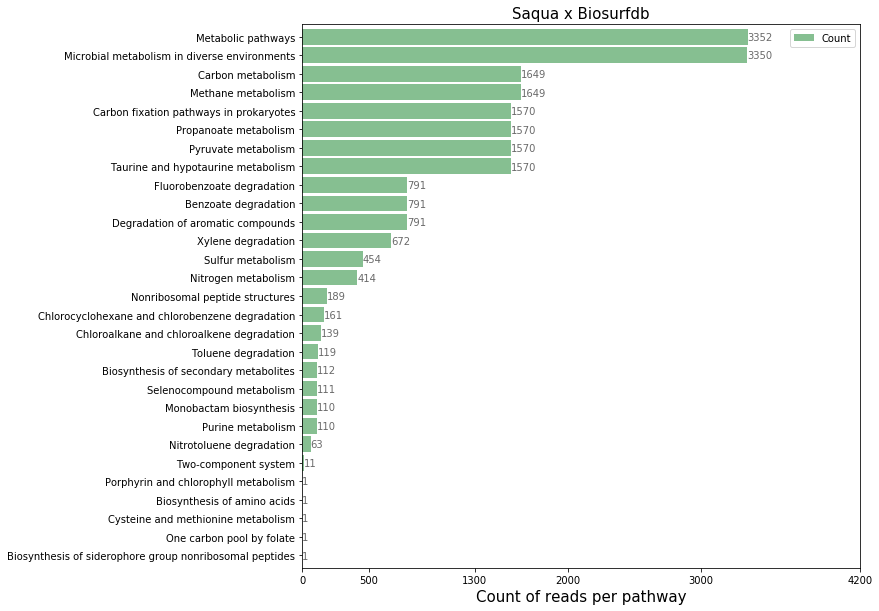

In [48]:
# Gerando o plot das vias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter



x = pd.DataFrame(pathways_count.items(),columns=["Pathway","Count"],index=list(pathways_count.keys()))
x = x.sort_values(by=["Count"],ascending=False)
ax = x.plot.barh(figsize=(10, 10), color='#86bf91', zorder=2, width=0.85)
ax.set_alpha(0.8)
ax.set_title("Saqua x Biosurfdb", fontsize=15)
ax.set_xlabel("Count of reads per pathway", fontsize=15);
ax.set_xticks([0,500,1300,2000,3000,4200])

for i in ax.patches:  
    ax.text(i.get_width()+.1, i.get_y()+.60, \
            str(round((i.get_width()), 2)), fontsize=10, color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


,Pathway,Count
Metabolic pathways,Metabolic pathways,3352
Microbial metabolism in diverse environments,Microbial metabolism in diverse environments,3350
Carbon metabolism,Carbon metabolism,1649
Methane metabolism,Methane metabolism,1649
Carbon fixation pathways in prokaryotes,Carbon fixation pathways in prokaryotes,1570
Propanoate metabolism,Propanoate metabolism,1570
Pyruvate metabolism,Pyruvate metabolism,1570
Taurine and hypotaurine metabolism,Taurine and hypotaurine metabolism,1570
Fluorobenzoate degradation,Fluorobenzoate degradation,791
Benzoate degradation,Benzoate degradation,791
